In [1]:
import sys
XCr_path = '/global/u2/a/aliaksei/CrystalBPM2/lume-crystal-bpm'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [2]:
Npoints = 180
delta_theta = np.linspace(-13.862472049580001e-6, 41.54780686945001e-6, Npoints)  
omega0 = 9000.0
Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [3]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

In [4]:
for i in range(0, Npoints):
    Rs[i], Ts[i] = single_realization(delta_theta[i], omega0)

Delta theta:  -1.3862472049580001e-05 ; Reflectivity:  0.00808603640071185 ; Transmission:  0.42235493075317115
Delta theta:  -1.3552917418747431e-05 ; Reflectivity:  0.022427147438451443 ; Transmission:  0.41735855842824693
Delta theta:  -1.324336278791486e-05 ; Reflectivity:  0.03673447065643784 ; Transmission:  0.4118972117051174
Delta theta:  -1.293380815708229e-05 ; Reflectivity:  0.031418477624367114 ; Transmission:  0.4146796164688786
Delta theta:  -1.2624253526249722e-05 ; Reflectivity:  0.013673461052639523 ; Transmission:  0.4232170230993265
Delta theta:  -1.2314698895417152e-05 ; Reflectivity:  0.009301210319220465 ; Transmission:  0.4264632552832525
Delta theta:  -1.2005144264584582e-05 ; Reflectivity:  0.026259815668016852 ; Transmission:  0.4203472398971805
Delta theta:  -1.1695589633752011e-05 ; Reflectivity:  0.04129490321772244 ; Transmission:  0.4145074557289394
Delta theta:  -1.1386035002919441e-05 ; Reflectivity:  0.0337358644674251 ; Transmission:  0.41831112490679

In [5]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [6]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

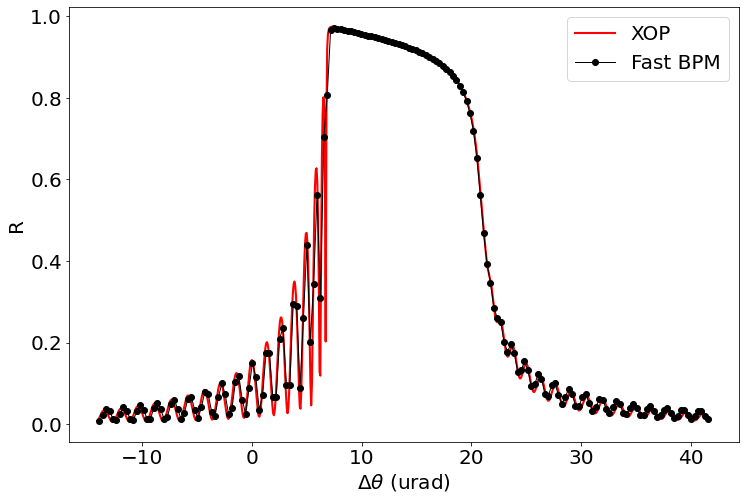

In [7]:
plt.plot(XOPdata[:,0]*4.848137, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot(1e6 * delta_theta, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')


plt.legend()
plt.xlabel(r'$\Delta \theta$ (urad)')
plt.ylabel('R')